# Text Analysis on Great Expectations Novel

### Imports- **Run First**

In [1]:
# Bring in text file with our novel
textfile = open('great_expectations.txt', 'r', encoding="utf8")
great_expect = textfile.read()

print(great_expect)


The Project Gutenberg eBook of Great Expectations, by Charles Dickens

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Great Expectations

Author: Charles Dickens

Release Date: July, 1998 [eBook #1400]
[Most recently updated: April 27, 2020]

Language: English

Character set encoding: UTF-8

Produced by: An Anonymous Volunteer and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK GREAT EXPECTATIONS ***

[Illustration]




Great Expectations

[1867 Edition]

by Charles Dickens


Contents

 Chapter I.
 Chapter II.
 Chapter III.
 Chapter IV.
 Chapter V.
 Chapter VI.
 Chapter VII.
 Chapte

In [2]:
# Import libraries
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

import pandas as pd
from PIL import Image
import numpy as np
import random
import re
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Lowercase words for word cloud
word_cloud_text = great_expect.lower()
# Remove numbers and alphanumeric words we don't need for word cloud
word_cloud_text = re.sub("[^a-zA-Z0-9]", " ", word_cloud_text)


In [5]:
# Tokenize the data to split it into words
tokens = word_tokenize(word_cloud_text)
# Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# Remove short words less than 3 letters in length
tokens = (word for word in tokens if len(word) >= 3)
# Add word cloud stopwords
stopwords_wc = set(stopwords.words("english"))


In [7]:
# Define gray_color_func function and mask variable for advanced word cloud
mask = np.array(Image.open("man_in_top_hat.jpeg"))


def gray_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


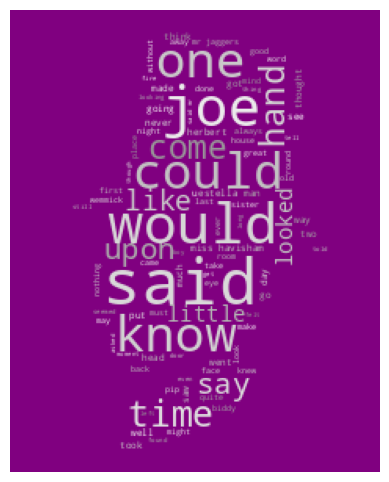

In [8]:
# Create advanced Word Cloud with our text data
wordcloud = WordCloud(background_color="purple", max_words=100, mask=mask,
                      color_func=gray_color_func, stopwords=stopwords_wc, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### How to analyze word frequency

In [9]:
#Create word frequency distribution
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'said': 1349, 'joe': 747, 'would': 599, 'one': 514, 'could': 484, 'know': 392, 'miss': 383, 'come': 375, 'time': 374, 'little': 371, ...})

In [10]:
#View the 50 most common words in the text
fdist.most_common(50)

[('said', 1349),
 ('joe', 747),
 ('would', 599),
 ('one', 514),
 ('could', 484),
 ('know', 392),
 ('miss', 383),
 ('come', 375),
 ('time', 374),
 ('little', 371),
 ('upon', 368),
 ('pip', 341),
 ('like', 327),
 ('looked', 325),
 ('man', 321),
 ('havisham', 318),
 ('never', 315),
 ('old', 314),
 ('herbert', 313),
 ('much', 312),
 ('well', 304),
 ('say', 301),
 ('made', 300),
 ('went', 290),
 ('wemmick', 284),
 ('way', 278),
 ('see', 277),
 ('hand', 270),
 ('estella', 270),
 ('good', 257),
 ('two', 255),
 ('saw', 250),
 ('put', 246),
 ('back', 244),
 ('took', 243),
 ('jaggers', 242),
 ('think', 241),
 ('going', 241),
 ('got', 238),
 ('thought', 238),
 ('came', 235),
 ('head', 232),
 ('biddy', 231),
 ('might', 228),
 ('boy', 220),
 ('day', 219),
 ('night', 213),
 ('done', 212),
 ('dear', 209),
 ('must', 208)]

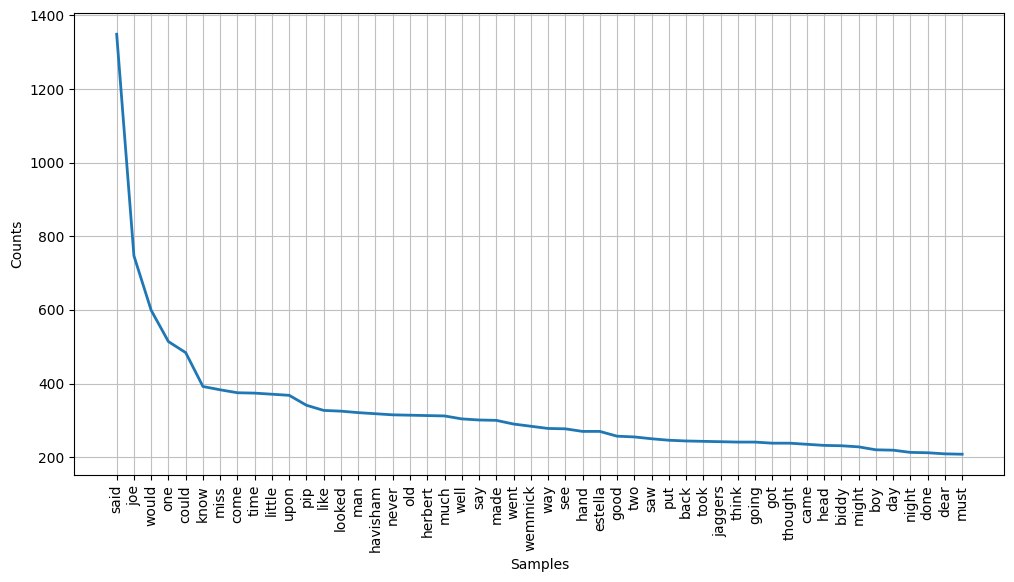

In [11]:
#Visualization of top 50 most common words in text
plt.figure(figsize=(12,6))
fdist.plot(50)
plt.show()

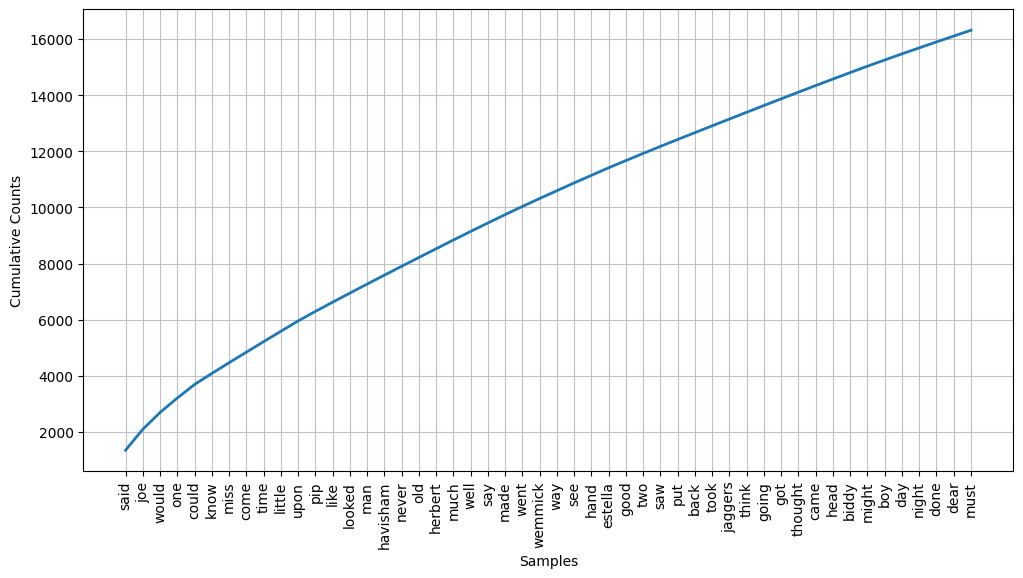

In [12]:
# Visualization of top 50 most common words in text cumulatively
plt.figure(figsize=(12, 6))
fdist.plot(50, cumulative = True)
plt.show()
